# Apply classification (aka decoding) to neural data
The above examples performed classification on a low-dimensional (2D or 3D) dataset. We will now extend this concept to actual neural data from the Visual Behavior dataset. 

In the example below, we will attempt to classify the neural response based on the stimulus that elicited that response. This is also referred to as 'decoding'. In other words, we will attempt to decode the stimulus based only on the neural response.

In the following example, the number of feature dimensions will be much higher. We will use the average response of each simultaneously recorded neuron in a short window following the stimulus as our feature matrix. Thus, our number of features will be equal to the number of simultaneously recorded neurons.

## first some imports

In [1]:
# os is a library of standard operating system functions
import os

# numpy is a library of mathematical functions for manipulating arrays
import numpy as np

# pandas is a library of data analysis tools
import pandas as pd

# matplotlib is a plotting library
import matplotlib.pyplot as plt

# seaborn is a library of plotting functions built on top of matplotlib
import seaborn as sns

# The allensdk is the institute toolset of interacting with data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

# mindscope_utilities contains convenience functions built on top of the AllenSDK
import mindscope_utilities
import mindscope_utilities.visual_behavior_ophys as ophys

# This sets the number of columns that will be displayed by default when viewing Pandas tables
pd.set_option('display.max_columns', 500)

## Next we need to get some data loaded

### Set up data paths, load session/experiment table
Recall from the Visual Behavior data overview that we have hundreds of behavior/ophys sessions, each with up to 8 simultaneously acquired imaging planes (aka 'experiments')

In [2]:
data_root = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/production_behavior_sessions'
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_root)

In [3]:
session_table = cache.get_ophys_session_table()
experiment_table = cache.get_ophys_experiment_table()

In [4]:
session_table.query('cre_line == "Slc17a7-IRES2-Cre" and equipment_name == "MESO.1"')

equipment_name  \
ophys_session_id                  
985609503                MESO.1   
988768058                MESO.1   
989267296                MESO.1   
990139534                MESO.1   
990464099                MESO.1   
991639544                MESO.1   
880709154                MESO.1   
882386411                MESO.1   
883619540                MESO.1   
884613038                MESO.1   
885557130                MESO.1   
886367984                MESO.1   
887031077                MESO.1   
888171877                MESO.1   
991958444                MESO.1   
992393325                MESO.1   
993253587                MESO.1   
993420347                MESO.1   
993738515                MESO.1   
993962221                MESO.1   
971632311                MESO.1   
971922380                MESO.1   
973384292                MESO.1   
973701907                MESO.1   
974167263                MESO.1   
974486549                MESO.1   
902884228                MESO.1   
903813946                MESO.1   
904771513                MESO.1   
906521029                MESO.1   
907177554                MESO.1   
907991198                MESO.1   
903621170                MESO.1   
904418381                MESO.1   
906299056                MESO.1   
906968227                MESO.1   
907753304                MESO.1   
908441202                MESO.1   
911719666                MESO.1   
913564409                MESO.1   
914161594                MESO.1   
914639324                MESO.1   
915306390                MESO.1   

                                                      full_genotype  mouse_id  \
ophys_session_id                                                                
985609503         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    479839   
988768058         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    479839   
989267296         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    479839   
990139534         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    479839   
990464099         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    479839   
991639544         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    479839   
880709154         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
882386411         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
883619540         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
884613038         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
885557130         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
886367984         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
887031077         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
888171877         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    451787   
991958444         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    485152   
992393325         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    485152   
993253587         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    485152   
993420347         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    485152   
993738515         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    485152   
993962221         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    485152   
971632311         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    484627   
971922380         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    484627   
973384292         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    484627   
973701907         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    484627   
974167263         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    484627   
974486549         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    484627   
902884228         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    456915   
903813946         Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...    456915   
904771513  

### Load one example session
We are going to select one session from the session table, session 990139534. This is a session with Sst-IRES-Cre mouse, which expressed GCaMP6f in Slc17a7 excitatory neurons. There were 8 simultaneously acquired imaging planes for this session. 
We can view metadata for this session as follows:

In [5]:
ophys_session_id = 854060305  #902884228 #990139534
session_table.loc[ophys_session_id]

equipment_name                                                                MESO.1
full_genotype                          Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt
mouse_id                                                                      440631
reporter_line                                             Ai148(TIT2L-GC6f-ICL-tTA2)
driver_line                                                           [Sst-IRES-Cre]
sex                                                                                M
age_in_days                                                                      129
cre_line                                                                Sst-IRES-Cre
indicator                                                                    GCaMP6f
session_number                                                                     6
prior_exposures_to_session_type                                                    0
prior_exposures_to_image_set                                     

### Download all associated experiments

Each session consists of one or more 'experiments', in which each experiment is a single imaging plane

Each mesoscope session has up to 8 experiments associated with the session. We will load all sessions into a dictionary with the experiment IDs as the keys

The first time that this cell is run, the associated NWB files will be downloaded to your local `data_storage_directory`. Subsequent runs of this cell will be faster since the data will already be cached locally.

In [45]:
experiments = {}
ophys_experiment_ids = session_table.loc[ophys_session_id]['ophys_experiment_id']
for ophys_experiment_id in ophys_experiment_ids:
    experiments[ophys_experiment_id] = cache.get_behavior_ophys_experiment(ophys_experiment_id)

## Load neural data into memory

The cell below will load the neural data into memory in the pandas 'tidy' format by iterating over each of the 8 experiments and using some helpful tools from the `visual_behavior_ophys` module of the `mindscope_utilities` package that was imported above as `ophys`. 

It will also include a subset of metadata from `ophys_experiment_table` to facilitate splitting by depth, structure (aka cortical area), cre line (aka cell class), etc.

Note that 'tidy' data means that each row represents only one observation. Observations are stacked vertically. Thus, the `timestamps` colums will repeat for every cell in the dataset.

Also note that this could fail if you are on a machine or cloud instance with too little available RAM.

In [46]:
# create an empty list
neural_data = []
for ii, ophys_experiment_id in enumerate(experiments.keys()): #tqdm is a package that shows progress bars for items that are iterated over
    print('on experiment {} of {}'.format(ii+1, len(experiments)), end='\r')
    this_experiment = experiments[ophys_experiment_id]
    
    # append the data for this experiment to a list
    neural_data.append(ophys.build_tidy_cell_df(this_experiment))
    
# concatate the list of dataframes into a single dataframe
neural_data = pd.concat(neural_data)

In [48]:
neural_data

timestamps       dff  events  filtered_events  cell_roi_id  \
0        10.52216  0.400583     0.0         0.000000   1080852071   
1        10.61538  0.126125     0.0         0.000000   1080852071   
2        10.70860 -0.083087     0.0         0.000000   1080852071   
3        10.80182  0.158960     0.0         0.000000   1080852071   
4        10.89504  0.301507     0.0         0.000000   1080852071   
...           ...       ...     ...              ...          ...   
48326  4517.21002  0.364505     0.0         0.060548   1080855250   
48327  4517.30327  0.486187     0.0         0.032406   1080855250   
48328  4517.39653  0.529427     0.0         0.013508   1080855250   
48329  4517.48979  0.522267     0.0         0.004386   1080855250   
48330  4517.58305  0.498687     0.0         0.001109   1080855250   

       cell_specimen_id  
0            1086550481  
1            1086550481  
2            1086550481  
3            1086550481  
4            1086550481  
...                 ...  
48326        1086551209  
48327        1086551209  
48328        1086551209  
48329        1086551209  
48330        1086551209  

[2561543 rows x 6 columns]

This dataframe is over 20 million rows long

In [49]:
len(neural_data)

2561543

And it contains the timeseries of 433 unique simultaneously recorded neurons!

In [50]:
len(neural_data['cell_specimen_id'].unique())

53

## Set up data for scikit-learn
We need to get the data into a standard format for scikit learn, which is often a feature matrix (`X`) and a vector of labels (`y`).

For this analysis, let's look at the responses to each of the 8 unique visual stimuli in this session, plus the response to omitted stimuli.

Our goal is to construct a feature matrix that consists of the the average response of each cell in a short (750ms) window following each stimulus on every trial (where a trial, for this purpose, is defined as a presentation of a given image). Each trial will be represented by an `n_neurons` dimension feature vector. Our feature matrix, `X`, will thus be `n_trials x n_neurons`

### Calculate the full response to each stimulus
First, we will calculate an event triggered response to each stimulus start time in the stimulus table.

To start with, let's define a simple wrapper function on the `mindscope_utilities.event_triggered_response` function. We are going to use the deltaF/F response in a window from 0 to 750 ms from every stimulus event to calculate the response:

In [11]:
def calculate_event_triggered_response(single_cell_data, event_times):
    event_triggered_response = mindscope_utilities.event_triggered_response(
        single_cell_data,
        t = 'timestamps',
        y = 'dff',
        event_times = event_times,
        t_before = 0,
        t_after = 0.75,
        output_sampling_rate = 30 
    )
    
    return event_triggered_response

We are going to define our 'event_times' as the start time of *every* unique stimulus. First we will load the stimulus table from one of our experiments. Recall that each experiment in a given session shares the same stimulus data:

In [12]:
stimulus_table = experiments[ophys_experiment_ids[0]].stimulus_presentations.drop(columns = ['image_set']) # dropping the 'image_set' column to avoid confusion. Image_set column contains a unique string for set of images presented in a session.
stimulus_table.head(10)

duration  end_frame  image_index image_name  index  \
stimulus_presentations_id                                                       
0                           0.25021    18001.0            0      im000      0   
1                           0.25020    18046.0            0      im000      1   
2                           0.25021    18091.0            0      im000      2   
3                           0.25020    18136.0            0      im000      3   
4                           0.25021    18181.0            0      im000      4   
5                           0.25023    18226.0            0      im000      5   
6                           0.25020    18271.0            0      im000      6   
7                           0.25020    18316.0            0      im000      7   
8                           0.25022    18361.0            0      im000      8   
9                           0.25017    18406.0            0      im000      9   

                           omitted  start_frame  start_time  stop_time  \
stimulus_presentations_id                                                
0                            False        17986   310.55053  310.80074   
1                            False        18031   311.30115  311.55135   
2                            False        18076   312.05179  312.30200   
3                            False        18121   312.80242  313.05262   
4                            False        18166   313.55303  313.80324   
5                            False        18211   314.30362  314.55385   
6                            False        18256   315.05426  315.30446   
7                            False        18301   315.80487  316.05507   
8                            False        18346   316.55547  316.80569   
9                            False        18391   317.30610  317.55627   

                           is_change  
stimulus_presentations_id             
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  
5                              False  
6                              False  
7                              False  
8                              False  
9                              False

Then we will select our event times as the `start_time` of each stimulus

In [13]:
event_times = stimulus_table['start_time']

Now iterate over every cell and apply the above function to build out an event triggered response for every cell/stimulus

In [51]:
# instantiate an empty list. We will append every event triggered response to this list
full_etr = []

# iterate over each unique cell
cell_specimen_ids = neural_data['cell_specimen_id'].unique()

for cell_count, cell_specimen_id in enumerate(cell_specimen_ids):
    print('on cell {}, #{} of {}'.format(cell_specimen_id, cell_count+1, len(cell_specimen_ids)), end='\r')
    
    # calculate the event triggered response for this cell
    full_etr_this_cell = calculate_event_triggered_response(
        neural_data.query('cell_specimen_id == @cell_specimen_id'),
        event_times
    )
    
    # add a column identifying the cell_specimen_id
    full_etr_this_cell['cell_specimen_id'] = cell_specimen_id
    # append to our list
    full_etr.append(full_etr_this_cell)
    
# concatenate our list of dataframes into a single dataframe
full_etr = pd.concat(full_etr)

The resulting dataframe includes the full response of every cell to every stimulus event on a common 30 Hz timebase. We can view it as follows.

In [32]:
full_etr

time       dff  event_number  event_time  cell_specimen_id
0       0.000000  0.023087             0   310.55053        1086550481
1       0.034091  0.024055             0   310.55053        1086550481
2       0.068182  0.041510             0   310.55053        1086550481
3       0.102273  0.058964             0   310.55053        1086550481
4       0.136364  0.056588             0   310.55053        1086550481
...          ...       ...           ...         ...               ...
110487  0.613636 -0.029240          4803  3916.56159        1086551209
110488  0.647727 -0.022908          4803  3916.56159        1086551209
110489  0.681818 -0.013129          4803  3916.56159        1086551209
110490  0.715909 -0.003350          4803  3916.56159        1086551209
110491  0.750000 -0.001446          4803  3916.56159        1086551209

[5856076 rows x 5 columns]

But as noted above, what we're interested in is just the *average* response of each cell to each stimulus. We can use the Pandas `groupby` command to group by `cell_specimen_id` and `event_number`

In [54]:
average_responses = full_etr.groupby(
    ['cell_specimen_id','event_number']
)[['dff']].mean().reset_index()
average_responses

cell_specimen_id  event_number       dff
0             1086547630             0 -0.250094
1             1086547630             1  0.318129
2             1086547630             2  0.349545
3             1086547630             3  0.144139
4             1086547630             4 -0.048715
...                  ...           ...       ...
254607        1086560061          4799 -0.007827
254608        1086560061          4800 -0.015307
254609        1086560061          4801  0.012357
254610        1086560061          4802 -0.023593
254611        1086560061          4803  0.028232

[254612 rows x 3 columns]

Also note that the `event_number` column corresponds to the `stimulus_presentations_id` value in the stimulus table. We will take advantage of this to merge in stimulus information:

In [55]:
average_responses = average_responses.rename(columns={'event_number':'stimulus_presentations_id'}).merge(
    stimulus_table,
    on = 'stimulus_presentations_id',
    how = 'left'
)
average_responses

cell_specimen_id  stimulus_presentations_id       dff  duration  \
0             1086547630                          0 -0.250094   0.25021   
1             1086547630                          1  0.318129   0.25020   
2             1086547630                          2  0.349545   0.25021   
3             1086547630                          3  0.144139   0.25020   
4             1086547630                          4 -0.048715   0.25021   
...                  ...                        ...       ...       ...   
254607        1086560061                       4799 -0.007827   0.25019   
254608        1086560061                       4800 -0.015307   0.25024   
254609        1086560061                       4801  0.012357   0.25020   
254610        1086560061                       4802 -0.023593   0.25020   
254611        1086560061                       4803  0.028232   0.25021   

        end_frame  image_index image_name  index  omitted  start_frame  \
0         18001.0            0      im000      0    False        17986   
1         18046.0            0      im000      1    False        18031   
2         18091.0            0      im000      2    False        18076   
3         18136.0            0      im000      3    False        18121   
4         18181.0            0      im000      4    False        18166   
...           ...          ...        ...    ...      ...          ...   
254607   234005.0            4      im045   4614    False       233990   
254608   234050.0            4      im045   4615    False       234035   
254609   234095.0            4      im045   4616    False       234080   
254610   234140.0            4      im045   4617    False       234125   
254611   234185.0            4      im045   4618    False       234170   

        start_time   stop_time  is_change  
0        310.55053   310.80074      False  
1        311.30115   311.55135      False  
2        312.05179   312.30200      False  
3        312.80242   313.05262      False  
4        313.55303   313.80324      False  
...            ...         ...        ...  
254607  3913.55912  3913.80931      False  
254608  3914.30972  3914.55996      False  
254609  3915.06037  3915.31057      False  
254610  3915.81098  3916.06118      False  
254611  3916.56159  3916.81180      False  

[254612 rows x 13 columns]

Now we can construct a dataframe called `features_and_labels` that will contain one row per trial, one column per cell, plus columns with the image_index and image_name

In [35]:
features_and_labels = average_responses.pivot(
    index = 'stimulus_presentations_id',
    columns = 'cell_specimen_id',
    values = 'dff'
).merge(
    stimulus_table[['image_index','image_name']],
    on = 'stimulus_presentations_id',
    how = 'left'
)
features_and_labels.sample(10)

1086547630  1086547796  1086547993  1086548072  \
stimulus_presentations_id                                                   
373                          1.063186   -0.035182    0.267298    0.015382   
1746                        -0.352160    0.186793    0.453092   -0.026125   
2289                        -0.831828   -0.003235   -0.027451   -0.154233   
1512                         0.351387   -0.020852   -0.018631    0.042298   
538                          0.008093   -0.080597    0.007501    0.116245   
751                          0.133298   -0.036255   -0.091711    0.045452   
3941                         0.172720    0.007771   -0.006006   -0.029123   
1901                         0.150467    0.021881   -0.013649    0.002956   
3706                         0.234958    0.030707    0.049607    0.234085   
914                          0.742561    0.204010    0.035741    0.040053   

                           1086548118  1086548658  1086548969  1086549303  \
stimulus_presentations_id                                                   
373                          0.023985    0.023268    0.248888    0.111731   
1746                         0.007367    0.041056   -0.039886    0.055910   
2289                         0.194730    0.005733    0.146814    0.116895   
1512                         0.019831   -0.053126   -0.068316   -0.022118   
538                          0.045949    0.057688    0.001141    0.135921   
751                         -0.008523   -0.018813    0.039620    0.126288   
3941                         0.005667    0.006816   -0.009455   -0.003861   
1901                         0.002396   -0.030585   -0.017415    0.095058   
3706                         0.005604    0.315926    0.367803    1.277888   
914                         -0.005238    0.040970    0.052128    0.061689   

                           1086549491  1086549726  1086549813  1086549949  \
stimulus_presentations_id                                                   
373                         -0.000648    0.016673   -0.108711    0.010901   
1746                         0.040983    0.006599    0.034996   -0.026463   
2289                        -0.047697   -0.004906   -0.011809   -0.045382   
1512                         0.048244    0.009962    0.014381   -0.027385   
538                          0.043404   -0.002680   -0.001886    0.039246   
751                          0.011668   -0.010341   -0.063575   -0.000316   
3941                        -0.017209   -0.023608   -0.269878   -0.053474   
1901                        -0.040687    0.003081    0.003282    0.022454   
3706                         0.112187   -0.014908    0.360311    0.184423   
914                          0.084509   -0.012418    0.153290   -0.027489   

                           1086550481  1086550544  1086550990  1086551114  \
stimulus_presentations_id                                                   
373                          0.001002    0.046921    0.053041    0.040773   
1746                         0.018489   -0.004212   -0.019490   -0.026552   
2289                         0.015035   -0.028691   -0.051065   -0.006443   
1512                        -0.019161   -0.024366   -0.019057   -0.006112   
538                          0.293453   -0.015434   -0.056243    0.010439   
751                          0.118333   -0.037163    0.022692    0.027877   
3941                         0.051413    0.000834   -0.017122   -0.011458   
1901                         0.030441    0.009469    0.051228    0.040105   
3706                        -0.036882    0.172252    0.186890    0.040085   
914                         -0.058907    0.011207    0.045939    2.842709   

                           1086551151  1086551209  1086551301  1086551457  \
stimulus_presentations_id                                                   
373                          0.017889    0.044549    0.003813   -0.047090   
1746                        -0.027664    0.064582    0.020556    0.003586   
2289               

The `X` matrix can be extracted by getting the columns associated with the cell_specimen_ids

In [36]:
X = features_and_labels[cell_specimen_ids]
X.sample(10)

1086550481  1086551114  1086551301  1086557083  \
stimulus_presentations_id                                                   
637                          0.676031    0.051766   -0.004432    0.135363   
500                          0.003482    1.640636    0.016752    0.143930   
3851                         0.967346    0.006709   -0.006104   -0.008485   
1620                         0.020901   -0.111041   -0.027523   -0.018996   
176                         -0.042712    0.092268   -0.017137    0.014429   
4021                         0.024911   -0.013268    0.019600    0.081955   
233                          0.555711    0.012804    0.079521   -0.008066   
683                          0.166850   -0.001850    0.045633    0.079898   
4268                        -0.044616    0.061008    0.039895   -0.001778   
3900                         0.035588    0.088520    0.312885   -0.021423   

                           1086557639  1086559064  1086558114  1086558224  \
stimulus_presentations_id                                                   
637                         -0.000782    0.042168   -0.035357    0.008425   
500                          0.035618    0.019933    0.107473    0.019590   
3851                         0.000345    0.037103   -0.004292   -0.002554   
1620                        -0.013011   -0.059216   -0.038808    0.002924   
176                          0.012699   -0.058360    0.018661    0.020513   
4021                        -0.077901    0.142369    0.050346   -0.013116   
233                          0.089107   -0.006895    0.035660   -0.005613   
683                         -0.013354   -0.060395   -0.064640    0.007491   
4268                        -0.015210    0.020292    0.024721   -0.018585   
3900                        -0.050605    0.089944   -0.085883   -0.008912   

                           1086558510  1086559206  1086557304  1086557208  \
stimulus_presentations_id                                                   
637                         -0.017472    0.036947   -0.000048    0.162301   
500                          0.224564    0.029194    0.016812   -0.024723   
3851                         0.036043    0.044441   -0.017863    0.024243   
1620                         0.204339    0.025795   -0.046982    0.020211   
176                         -0.002443    0.021907    0.028902    0.011198   
4021                         0.243083    0.014998    0.007139   -0.035114   
233                          0.427658    0.019939    0.103350    0.268262   
683                         -0.099907   -0.016209   -0.001789    0.017714   
4268                         0.059127   -0.023024   -0.019681    0.028161   
3900                        -0.066859   -0.090613   -0.147633    0.027029   

                           1086560061  1086559681  1086559885  1086559968  \
stimulus_presentations_id                                                   
637                          0.103069    0.002399    0.022596    0.046643   
500                          0.029229    0.019470   -0.002568    0.049455   
3851                         0.024782    0.003756    0.029578    0.000075   
1620                         0.024508    0.031697   -0.001621    0.017287   
176                          0.002139   -0.009910   -0.037054   -0.012770   
4021                         0.028431    0.077095    0.003414   -0.012958   
233                         -0.024064    0.052047    0.006397   -0.012633   
683                         -0.012219   -0.044360    0.012230    0.031653   
4268                        -0.011779    0.000755   -0.072955    0.039388   
3900                         0.026768    0.107922    0.010322   -0.012926   

                           1086557470  1086547796  1086547993  1086548118  \
stimulus_presentations_id                                                   
637                          0.058027    0.291354    0.279039    0.012539   
500                          0.027176   -0.080236    0.007376   -0.038117   
3851               

And `y` is just the image_name column (it could also be the image_index column if you want a numeric value instead of a string to represent the image identity)

In [37]:
y = features_and_labels['image_name']
y.sample(10)

stimulus_presentations_id
3713      im035
3821      im075
4143      im054
1425      im054
1867      im045
3770    omitted
144       im000
4707      im035
4341      im000
1137      im031
Name: image_name, dtype: object

## Dimensionality reduction
One way of visualizing the data is to use a dimensionality reduction technique. For example, we can use t-SNE, which will project our n-neuron-dimensional feature space into two dimensions.

In [38]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X.values)

And visualize the results, with colors representing each unique stimulus.

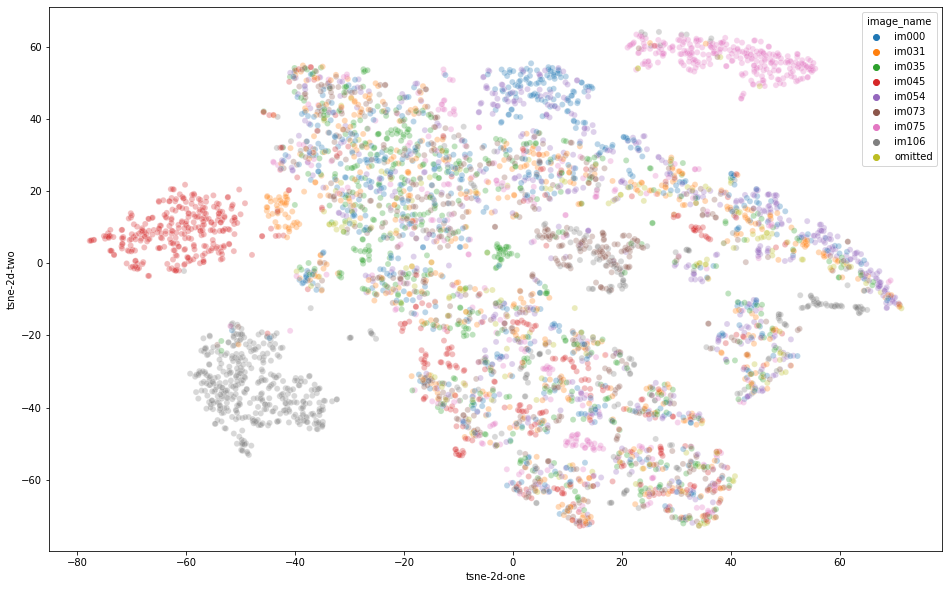

In [39]:
features_and_labels['tsne-2d-one'] = X_embedded[:,0]
features_and_labels['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    data=features_and_labels,
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="image_name",
    hue_order = np.sort(features_and_labels['image_name'].unique()),
    palette=sns.color_palette()[:9],
    legend="full",
    alpha=0.3
)

This demonstrates that the time-averaged population responses to at least some of the stimuli seem to fall into distinct clusters in our higher dimensional space, while others appear more overlapped. This implies that a decoding analysis might be more successful at decoding some stimuli than others.

## Train a simple decoder
We can use an SVM decoder from scikit learn to ask how well we can decode image identity from the feature matrix we have constructed.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

Split our data into train and test sets, instantiate the model, then fit.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = svm.SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

Use the model to make predictions on the held-out test set

In [42]:
y_pred = model.predict(X_test)
y_pred

array(['im035', 'im073', 'im073', ..., 'im073', 'im035', 'im045'],
      dtype=object)

Evaluate the accuracy

In [43]:
accuracy_score(y_test, y_pred)

0.6166456494325346

In [44]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    columns = ['predicted_{}'.format(im) for im in model.classes_],
    index = ['actual_{}'.format(im) for im in model.classes_]
)

predicted_im000  predicted_im031  predicted_im035  \
actual_im000                 88                4               56   
actual_im031                 14               84               35   
actual_im035                  5               17              122   
actual_im045                  0               16                7   
actual_im054                 35                7               28   
actual_im073                  5               14               45   
actual_im075                  2                8               23   
actual_im106                  1                3               10   
actual_omitted                6                8               10   

                predicted_im045  predicted_im054  predicted_im073  \
actual_im000                  1               19               29   
actual_im031                  0                8               39   
actual_im035                  0                7               25   
actual_im045                163                0               13   
actual_im054                  0               89               26   
actual_im073                  0                4              107   
actual_im075                  0                3               34   
actual_im106                  0                1               10   
actual_omitted                1                6               10   

                predicted_im075  predicted_im106  predicted_omitted  
actual_im000                  0                0                  0  
actual_im031                  0                0                  2  
actual_im035                  0                2                  0  
actual_im045                  0                1                  1  
actual_im054                  0                0                  1  
actual_im073                  0                1                  0  
actual_im075                122                2                  0  
actual_im106                  1              193                  0  
actual_omitted                1                1                 10

In [56]:
## add images themselves

In [57]:
## what about bias/precision - does it make sense for multi-class classification?

In [60]:
sorted_matrix = features_and_labels.sort_values(by = 'image_name')
sorted_matrix

1086547630  1086547796  1086547993  1086548072  \
stimulus_presentations_id                                                   
0                           -0.250094    0.023275   -0.029209   -0.006126   
3090                         0.056035   -0.035798   -0.007608   -0.068975   
3089                        -0.206295   -0.018965   -0.007388   -0.079950   
3088                        -0.199249    0.025484   -0.002545   -0.000643   
3087                         0.281398   -0.022379    0.008856    0.057959   
...                               ...         ...         ...         ...   
3036                        -0.091712   -0.014047   -0.068924   -0.080040   
4534                         0.165442    0.037955    0.029074   -0.064768   
1624                        -0.619113   -0.023634   -0.077407   -0.280049   
385                         -1.730649    0.085904   -0.017898   -0.184831   
2273                        -1.129930   -0.050357    0.017993   -0.040776   

                           1086548118  1086548658  1086548969  1086549303  \
stimulus_presentations_id                                                   
0                            0.006541    0.008205   -0.035545   -0.041336   
3090                         0.014370   -0.016678   -0.011735    0.018213   
3089                        -0.004707    0.010121    0.005826   -0.052952   
3088                         0.041102    0.040573   -0.131955   -0.015485   
3087                         0.030041    0.009876    0.024051   -0.015673   
...                               ...         ...         ...         ...   
3036                         0.061353   -0.010885   -0.156147   -0.144778   
4534                         0.022379   -0.001622   -0.040270   -0.003997   
1624                         0.036573   -0.089145   -0.085550   -0.149922   
385                          0.006842   -0.081797   -0.035220   -0.050907   
2273                        -0.010528   -0.026428    0.022304   -0.045211   

                           1086549491  1086549726  1086549813  1086549949  \
stimulus_presentations_id                                                   
0                           -0.015731   -0.003316    0.146540   -0.035120   
3090                        -0.030769    0.023125   -0.085425   -0.037762   
3089                        -0.007465   -0.005277   -0.056446   -0.021333   
3088                         0.015131   -0.007576    0.106242   -0.011469   
3087                        -0.017669    0.007241   -0.050137   -0.006319   
...                               ...         ...         ...         ...   
3036                        -0.027083   -0.018142    0.012132   -0.038878   
4534                        -0.001812    0.000249   -0.014956   -0.022458   
1624                        -0.003531   -0.040941   -0.004008   -0.046347   
385                         -0.039479    0.004796    0.103836   -0.053186   
2273                         0.076012   -0.003895    0.017684    0.041636   

                           1086550481  1086550544  1086550990  1086551114  \
stimulus_presentations_id                                                   
0                            0.016197   -0.015550    0.003884    0.002971   
3090                        -0.016273    0.003285   -0.027055   -0.080287   
3089                        -0.033953    0.004835    0.031942    0.048918   
3088                         0.056285    0.017158   -0.002051    0.038273   
3087                         0.022691   -0.009944    0.031844    0.002949   
...                               ...         ...         ...         ...   
3036                         0.031423    0.009380    0.000119    0.304853   
4534                        -0.133154   -0.003302    0.003171   -0.020113   
1624                         0.031901   -0.054130   -0.048324    0.015857   
385                         -0.163635   -0.043021   -0.189624   -0.109560   
2273                        -0.007882    0.029852   -0.054611   -0.016429   

                   

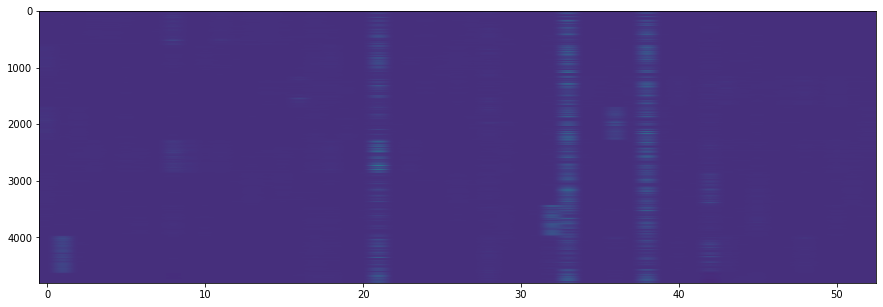

In [63]:
fig, ax = plt.subplots(figsize = (15,5))
ax.imshow(sorted_matrix[cell_specimen_ids], aspect='auto')